# 📖 Import Library 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import classification_report, accuracy_score


from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# 💻 Load in data

In [4]:
df=pd.read_csv('../datasets/poker_completed.csv')

In [5]:
df.shape

(8863, 33)

In [82]:
# Features (X) and Target (y)
X = df[['round_label', 'pot', 'player_stack', 'poker_hand', 'card1_rank', 'card2_rank', 
        'card1_suit', 'card2_suit', 'community1_rank', 'community2_rank', 'community3_rank',
        'community4_rank', 'community5_rank', 'community1_suit', 'community2_suit', 
        'community3_suit', 'community4_suit', 'community5_suit']]

y = df['action_label']  

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_poly)
X_test_sc = scaler.transform(X_test_poly)

# Define the Neural Network
model = Sequential([
    Input(shape=(X_train_sc.shape[1],)),  
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),  # Increased neurons
    Dropout(0.3),  # Higher dropout to reduce overfitting
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # More neurons
    Dropout(0.3),  
    Dense(3, activation='softmax')  # Multi-class output
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
              metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train the model
history = model.fit(X_train_sc, y_train, 
                    epochs=100,  
                    batch_size=128, 
                    validation_split=0.2, 
                    callbacks=[early_stop], 
                    verbose=1)

# Predictions
y_pred_prob = model.predict(X_test_sc)  # Predicted probabilities
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class labels (0, 1, or 2)

Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3662 - loss: 4.6706 - val_accuracy: 0.3977 - val_loss: 3.5118
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4083 - loss: 3.2421 - val_accuracy: 0.3921 - val_loss: 2.5450
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4352 - loss: 2.3647 - val_accuracy: 0.4147 - val_loss: 1.9265
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4391 - loss: 1.8171 - val_accuracy: 0.4069 - val_loss: 1.5688
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4449 - loss: 1.4879 - val_accuracy: 0.4372 - val_loss: 1.3467
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4527 - loss: 1.3049 - val_accuracy: 0.4118 - val_loss: 1.2206
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4392 - loss: 1.1935 - val_accuracy: 0.4330 - val_loss: 1.1377
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4638 - loss: 1.1193 - val_accuracy: 0.4118 - v

In [22]:
# Base line
y.value_counts(normalize = True )

action_label
1    0.388807
0    0.363647
2    0.247546
Name: proportion, dtype: float64

In [84]:
print(model.evaluate(X_train_sc, y_train))
print(model.evaluate(X_test_sc, y_test))

222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.4866 - loss: 0.9871
[0.9909895658493042, 0.48885753750801086]
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 688us/step - accuracy: 0.4674 - loss: 1.0123
[1.0051264762878418, 0.4630569517612457]


In [86]:
# Display results
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.30      0.32       622
           1       0.54      0.58      0.56       737
           2       0.46      0.51      0.48       414

    accuracy                           0.46      1773
   macro avg       0.45      0.46      0.45      1773
weighted avg       0.45      0.46      0.46      1773



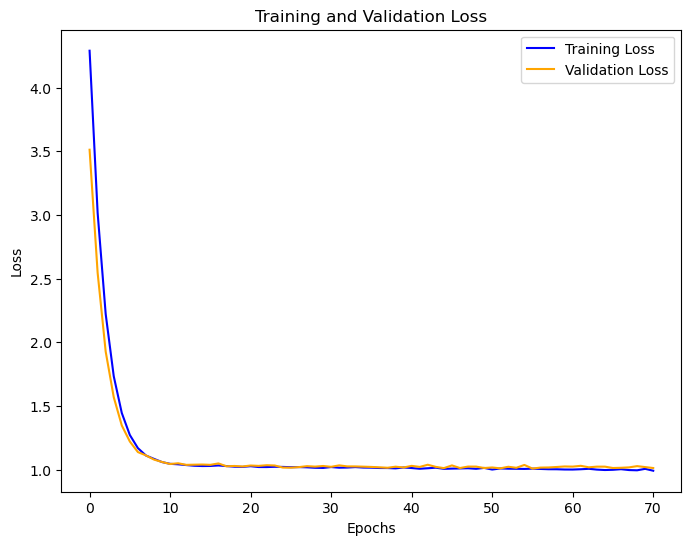

In [88]:
# Plot Training vs Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

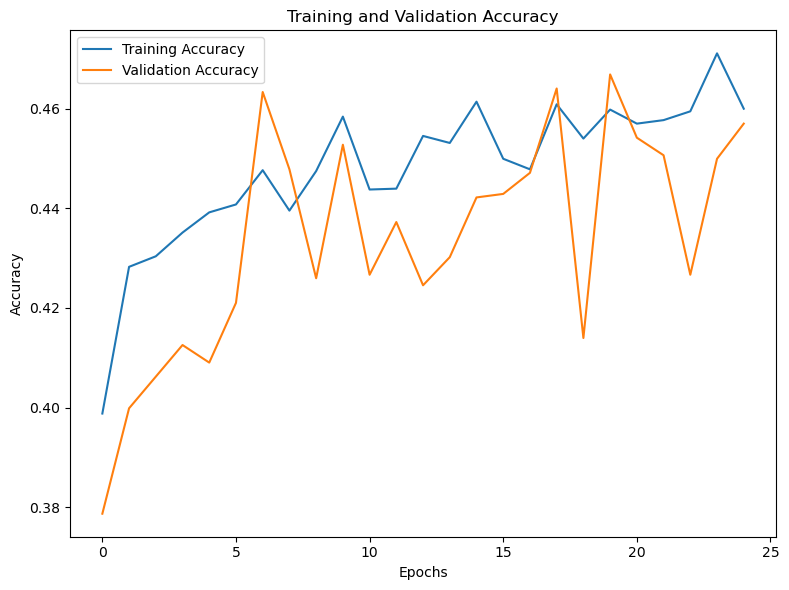

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'],label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show();

The graph shows the training accuracy and validation accuracy of a neural network model over the course of 100 epochs. The blue line represents the training accuracy, which starts off low but gradually increases as the model is trained. The orange line represents the validation accuracy, which also increases over time but is generally lower than the training accuracy.

This pattern of the training accuracy being higher than the validation accuracy is typical and can indicate that the model is overfitting to the training data. Overfitting occurs when a model performs well on the training data but fails to generalize well to new, unseen data.

To address this, you may want to consider techniques like regularization, early stopping, or increasing the model's complexity to improve its ability to generalize. Monitoring the gap between training and validation accuracy can help you identify when the model is starting to overfit and adjust your training approach accordingly.

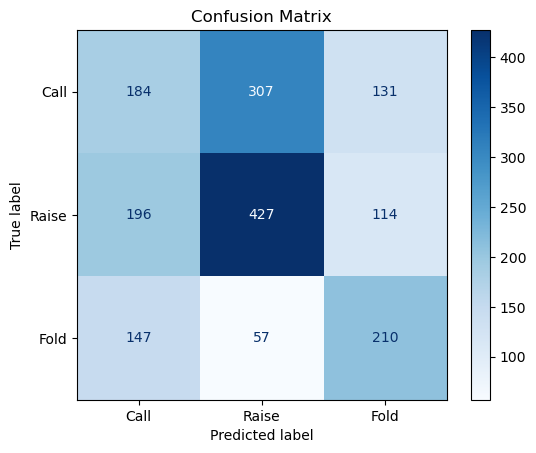

In [90]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Call', 'Raise', 'Fold'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## 📝 How Neural Network Perform?

1. **Overall Accuracy:** The overall accuracy of the Neural Network is **46%**
2. **Performance Metrics for Each Class**:
- **Class 0 (Call)**: Precision = 35%, Recall = 30%, F1 = 32%  
- **Class 1 (Raise)**: Precision = 54%, Recall = 58%, F1 = 56%  
- **Class 2 (Fold)**: Precision = 46%, Recall = 51%, F1 = 48%

The model performs best for predicting Raise (Class 1) with the highest recall and F1-score.
The model struggles with Call (Class 0), as both its precision and recall are relatively low.
Fold (Class 2) has better performance compared to Call but still has a lower F1-score than Raise.